# Обучение с подкреплением

# Введение

Обучение с подкреплением – метод, который стремится отобразить ситуации на действия, чтобы максимизировать численный сигнал – вознаграждение. Для этого агенту необходимо понять, какие действия приносят максимальное вознаграждение, перебирая различные варианты. При этом действия могут влиять не только на непосредственное вознаграждение, но и на следующие ситуации. Эти две характеристики – поиск методом «поиск методом проб и ошибок» и отложенное вознаграждение – являются наиболее важными отличительными чертами обучения с подкреплением.   

Обучающийся агент  должен уметь в какой-то степени воспринимать состояние среды и предпринимать действия, изменяющие это состояние. Агента есть цель или несколько целей, связанных со стремлением изменять состояние окружающей среды. Любой метод, подходящий для решения таких задач, будет рассматриваться нами как метод обучения с подкреплением.  

## Цель работы

Исследование алгоритмов обучения с подкреплением.

## Постановка задачи

Для выполнения данной лабораторной работы предлагается ознакомиться с книгой Лю Ю. (Х.) Обучение с подкреплением на PyTorch: сборник рецептов / пер. с англ. А. А. Слинкина. – М.: ДМК Пресс, 2020. – 282 с.: ил.  

1. В рамках работы нужно создать экземпляр среды CartPole для 100 меток времени (эпизодов), а также воспользоваться следующими алгоритмами решения данной задачи: случайный поиск, восхождение на вершину и градиент стратегии.   Суть задачи CartPole и методы ее решения объясняются на страницах 29-52 книги.  
2. Для каждого алгоритма решения увеличьте и уменьшите параметры: для случайного поиска - количество эпизодов, для восхождения на вершину - количество эпизодов и шум, для градиента стратегии - количество эпизодов и скорость обучения. Зафиксируйте получившиеся результаты решения задачи с изначальными и измененными параметрами. В случае, если задача не была решена за N-ое количество эпизодов, попробуйте запустить код алгоритма заново. Сделайте выводы исходя из данных в таблице.  
3. Реализуйте любой алгоритм из следующих глав для другой среды (например, FrozenLake, Mountain Car или Flappy Bird). Опишите в отчете в чем заключается суть выбранной задачи и методе ее решения.  
В приложенном файле находится работающий код для выполнения данной работы. Не забудьте предварительно установить менеджер пакетов pip, пакеты gym, pygame, matplotlib, torch.   

## Содержание отчета

Структура основной части отчета:

* Цель работы
* Постановка задачи
* Ход работы - скриншоты работы программы, графики полного вознаграждения на этапе обучения, сравнительный анализ алгоритмов, описание и реализация алгоритмов для среды CartPole и другой среды
* Выводы

## Теория

 Обучение с подкреплением (Reinforcement Learning, RL)  — это метод машинного обучения, в котором агент учится принимать решения, взаимодействуя с окружающей средой, чтобы максимизировать некоторую кумулятивную награду. В отличие от других подходов, таких как обучение с учителем (supervised learning), здесь агент не имеет заранее размеченных данных, а обучается на основе проб и ошибок. 

### Основные понятия RL
1. Агент (Agent):  
Это объект, который принимает решения, изучает стратегию поведения и выполняет действия.
2. Среда (Environment):  
Внешняя среда, с которой взаимодействует агент. Среда отвечает на действия агента, предоставляя новое состояние и награду.
3. Состояние (State, $(s)$):  
Набор характеристик, описывающих текущее положение среды. Например, в задаче CartPole это координаты тележки, угол наклона стержня и их скорости.
4. Действие (Action, $(a)$):  
Выбор агента, влияющий на состояние среды. Например, движение тележки влево или вправо.
5. Вознаграждение (Reward, $(r)$):  
Числовое значение, показывающее, насколько действие было успешным в контексте поставленной задачи. Цель агента — максимизировать суммарное вознаграждение.
6. Политика (Policy, $(\pi)$):  
Стратегия агента, определяющая, какое действие выбрать в каждом состоянии.
7. Функция ценности (Value Function, $(V(s))$):  
Оценивает, насколько хорошо находиться в определенном состоянии, ожидая будущую суммарную награду.  
8. Функция действия (Action-Value Function, $(Q(s, a))$):
Оценивает ценность выполнения конкретного действия $(a)$ в состоянии ($s$).  

### Процесс обучения
1. Агент наблюдает текущее состояние среды $(s_t)$.
2. Используя свою политику $(\pi)$, агент выбирает действие $(a_t)$.
3. Среда обновляется в результате действия агента, переходя в новое состояние $(s_{t+1})$, и возвращает награду $(r_t)$.
4. Агент обновляет свою политику или оценки, основываясь на полученной информации, чтобы лучше выбирать действия в будущем.

### Примеры задач
Обучение с подкреплением применяется в задачах, где требуется принимать последовательность решений:
- Управление роботами.
- Игры (шахматы, Go).
- Управление производственными процессами.
- Самообучающиеся системы рекомендации.

# Основная часть

## I часть

В рамках работы нужно создать экземпляр среды CartPole для 100 меток времени (эпизодов), а также воспользоваться следующими алгоритмами решения данной задачи: случайный поиск, восхождение на вершину и градиент стратегии.

In [8]:
import gym

import pandas as pd
import numpy as np
import torch

import matplotlib.pyplot as plt

### Случайный поиск (Random Search)

Случайный поиск — это простой метод, при котором агенты случайным образом выбирают параметры (например, политику или параметры модели), и в дальнейшем оценивают, насколько успешным было их поведение в заданной среде. Это метод без обучения, который не использует информацию о предыдущих шагах для улучшения будущих.

Реализация:
* Инициализация случайной политики (или случайных параметров для модели).
* Выполнение эпизодов, в которых агент выполняет действия согласно случайной политике.
* Получение награды (например, время, пока стержень не падает).
* Повторение процесса с новыми случайными параметрами и анализирование результатов.

In [9]:
def random_search_game(env=None, n_episodes=100, output=True):
    if not env:
        env = gym.make('CartPole-v1')
    
    total_rewards = []

    for episode in range(n_episodes):
        env.reset()
        done = False
        total_reward = 0
        
        
        while not done:
            action = env.action_space.sample()  
            _, reward, done, _, _ = env.step(action)
            total_reward += reward
        
        total_rewards.append(total_reward)

        if total_reward >= env.spec.max_episode_steps:  # Проверка на достижение победы
            print(f"Решено за {episode + 1} эпизодов! Тотал награда: {total_reward}")
            break 
        
        if output:
            print(f"Эпизод {episode + 1}, Тотал награда: {total_reward}")

    if len(total_rewards) == n_episodes:
        print(f'Игра так и не была выигара за {n_episodes} эпизодов')
        
    return total_rewards

### Восхождение на вершину (Hill Climbing)

Восхождение на вершину — это метод оптимизации, при котором агент начинает с некоторого случайного состояния и пробует улучшить его, применяя небольшие изменения к параметрам. В отличие от случайного поиска, восхождение на вершину использует информацию о предыдущем результате, чтобы улучшить текущие параметры. Однако этот метод может застревать в локальных оптимумах.  

Реализация:  
* Инициализация случайной политики.
* В каждый момент времени изменяются параметры (например, параметры нейросети или веса) и оценивается их производительность.
* Если новая политика лучше (получена большая награда), она становится "новой лучшей политикой".
* Процесс повторяется с обновленными параметрами.

In [10]:
def run_episode_hill(env, weight):
    state, _ = env.reset()  
    total_reward = 0
    is_done = False
    while not is_done:
        state = torch.from_numpy(state).float()
        action = torch.argmax(torch.matmul(state, weight))  
        state, reward, is_done, _, _ = env.step(action.item())  
        total_reward += reward
    return total_reward

def hill_climbing_game(env=None, n_episodes=100, noise_level=0.01, output = True):
    if not env:
        env = gym.make('CartPole-v1')
    
    n_state = env.observation_space.shape[0]
    n_action = env.action_space.n
    
    best_total_reward = 0
    total_rewards = []
    best_weight = torch.rand(n_state, n_action)
    for episode in range(n_episodes):
        weight = best_weight + noise_level * torch.rand(n_state, n_action)
        
        total_reward = run_episode_hill(env, weight)
        
        if total_reward >= best_total_reward:
            best_total_reward = total_reward
            best_weight = weight
            noise_level = max(noise_level / 2, 1e-4)  
        else:
            noise_level = min(noise_level * 2, 2)  
        
        if output:
            print(f"Эпизод {episode + 1}: {total_reward}")
        total_rewards.append(total_reward)
        
        if total_reward >= env.spec.max_episode_steps:
            print(f"Решено за {episode + 1} эпизодов!")
            break

    
    if len(total_rewards) == n_episodes:
        print(f'Игра так и не была выигара за {n_episodes} эпизодов')

        
    return total_rewards


### Градиентный спуск стратегии (Policy Gradient)

Градиентный спуск стратегии — это метод обучения с подкреплением, в котором агент пытается оптимизировать свою политику, используя градиенты, полученные из функции вознаграждения. В отличие от методов, основанных на значениях (например, Q-learning), этот метод работает непосредственно с функцией политики, то есть с распределением вероятности выбора действий. Метод используется для обучения параметризованных политик, таких как нейросети.

Реализация:
* Инициализация нейросети (или другой параметризованной модели), которая будет представлять политику.
* Агент взаимодействует с окружающей средой, выбирая действия по текущей политике и собирая вознаграждения.
* Вычисляется градиент функции вознаграждения относительно параметров политики.
* Параметры политики обновляются с использованием полученных градиентов.

In [45]:
def run_episode_gradient(env, weight):
    state, _ = env.reset()
    grads = []
    total_reward = 0
    is_done = False
    step_count = 0

    while not is_done:
        state = torch.from_numpy(state).float()
        z = torch.matmul(state, weight)  
        probs = torch.nn.Softmax(dim=0)(z)  # Нормализация вероятностей
        
        # Выбор действия с помощью multinomial (работает для многоклассовой классификации)
        action = torch.multinomial(probs.view(1, -1), 1).item()  

        d_softmax = torch.diag(probs) - probs.view(-1, 1) * probs
        d_log = d_softmax[action] / probs[action]
        grad = state.view(-1, 1) * d_log  
        grads.append(grad)

        state, reward, is_done, _, _ = env.step(action)
        total_reward += reward  
        
        step_count += 1
        if step_count > env.spec.max_episode_steps: 
            print("Максимальное количество шагов превышено!")
            done = True
        

    return total_reward, grads


def policy_gradient_game(env=None, n_episodes=100, lr=0.01, output = True):
    if not env:
        env = gym.make('CartPole-v1')  
    
    n_state = env.observation_space.shape[0]  
    n_action = env.action_space.n
    weight = torch.rand(n_state, n_action)  
    
    total_rewards = []  

    for episode in range(n_episodes):
        
            
        total_reward, gradients = run_episode_gradient(env, weight)
        
        if output: 
            print(f'Эпизод {episode + 1}: {total_reward}')

        
        
        for i, gradient in enumerate(gradients):
            weight += lr * gradient * (total_reward - i)
        
        total_rewards.append(total_reward)
        
        if total_reward >= env.spec.max_episode_steps:
            print(f"Решено за {episode + 1} эпизодов!")
            break
        
    if len(total_rewards) == n_episodes:
        print(f'Игра так и не была выигара за {n_episodes} эпизодов')

    
    return total_rewards

### Функция для тестирования

In [27]:
def run_cartpole(method = 'Случайный поиск', env = None, n_episodes=100, noise_level = 0.01, lr = 0.01, output = True):
    print(method)    
    if env:
        env.reset()
    if method == 'Случайный поиск':
        rewards = random_search_game(env = env, n_episodes = n_episodes, output= output)
    
    elif method == 'Восхождение на вершину':
        rewards = hill_climbing_game(env = env, n_episodes = n_episodes, noise_level = noise_level, output= output)
    
    elif method == 'Градиентный спуск':
        rewards = policy_gradient_game(env = env, n_episodes = n_episodes, lr = lr, output= output)
    else:
        print("Неизвестный метод!")
        return
    
    plt.plot(rewards)
    plt.title(f"Алгоритм {method}")
    plt.xlabel('Эпизод')
    plt.ylabel('Вознаграждение')
    plt.show()
    
    total_rounds = len(rewards)
    winned = total_rounds == n_episodes

    return rewards, total_rounds, winned, sum(rewards) / total_rounds
    

### Тестирование методов

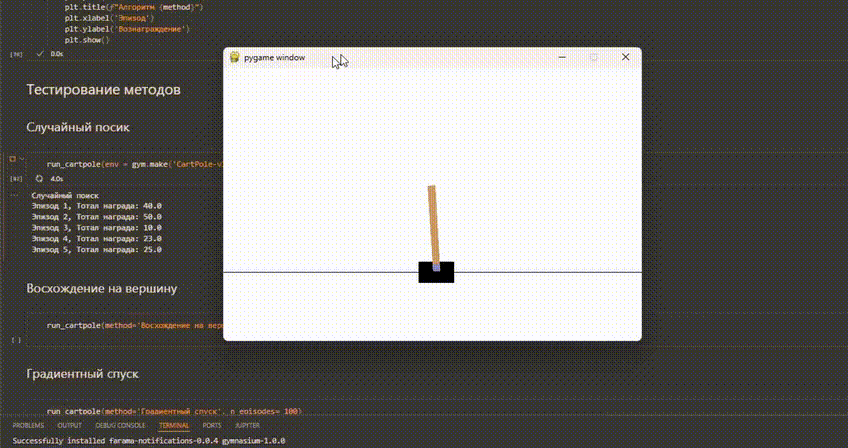

#### Случайный посик

Случайный поиск
Эпизод 1, Тотал награда: 17.0
Эпизод 2, Тотал награда: 46.0
Эпизод 3, Тотал награда: 16.0
Эпизод 4, Тотал награда: 15.0
Эпизод 5, Тотал награда: 11.0
Эпизод 6, Тотал награда: 11.0
Эпизод 7, Тотал награда: 57.0
Эпизод 8, Тотал награда: 18.0
Эпизод 9, Тотал награда: 27.0
Эпизод 10, Тотал награда: 17.0
Эпизод 11, Тотал награда: 38.0
Эпизод 12, Тотал награда: 12.0
Эпизод 13, Тотал награда: 19.0
Эпизод 14, Тотал награда: 27.0
Эпизод 15, Тотал награда: 15.0
Эпизод 16, Тотал награда: 11.0
Эпизод 17, Тотал награда: 18.0
Эпизод 18, Тотал награда: 17.0
Эпизод 19, Тотал награда: 24.0
Эпизод 20, Тотал награда: 16.0
Эпизод 21, Тотал награда: 47.0
Эпизод 22, Тотал награда: 12.0
Эпизод 23, Тотал награда: 23.0
Эпизод 24, Тотал награда: 35.0
Эпизод 25, Тотал награда: 14.0
Эпизод 26, Тотал награда: 29.0
Эпизод 27, Тотал награда: 19.0
Эпизод 28, Тотал награда: 29.0
Эпизод 29, Тотал награда: 19.0
Эпизод 30, Тотал награда: 22.0
Эпизод 31, Тотал награда: 34.0
Эпизод 32, Тотал награда: 9.0
Эп

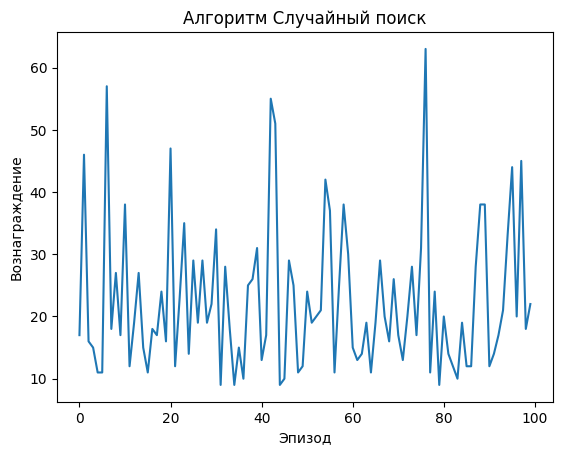

In [28]:
# run_cartpole(env = gym.make('CartPole-v1', render_mode="human"), method='Случайный поиск', n_episodes = 100)
random_awards = run_cartpole(method='Случайный поиск', n_episodes = 100)

#### Восхождение на вершину

Восхождение на вершину
Эпизод 1: 26.0
Эпизод 2: 23.0
Эпизод 3: 144.0
Эпизод 4: 110.0
Эпизод 5: 39.0
Эпизод 6: 132.0
Эпизод 7: 27.0
Эпизод 8: 8.0
Эпизод 9: 207.0
Эпизод 10: 154.0
Эпизод 11: 295.0
Эпизод 12: 366.0
Эпизод 13: 415.0
Эпизод 14: 300.0
Эпизод 15: 309.0
Эпизод 16: 526.0
Решено за 16 эпизодов!


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


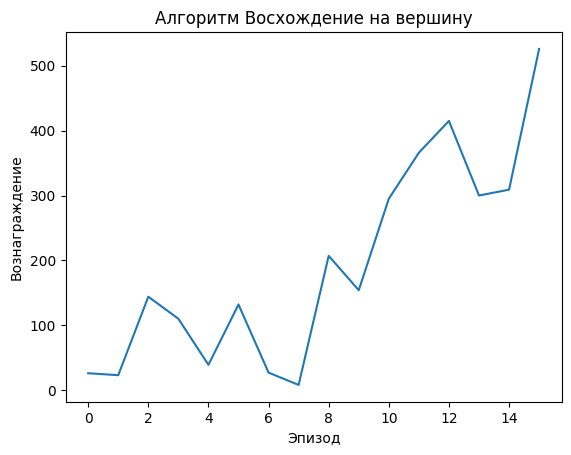

In [33]:
hill_awards = run_cartpole(method='Восхождение на вершину', n_episodes= 100, noise_level=0.05)

#### Градиентный спуск

Градиентный спуск
Эпизод 1: 15.0
Эпизод 2: 17.0
Эпизод 3: 21.0
Эпизод 4: 33.0
Эпизод 5: 36.0
Эпизод 6: 66.0
Эпизод 7: 58.0
Эпизод 8: 38.0
Эпизод 9: 57.0
Эпизод 10: 88.0
Эпизод 11: 99.0
Эпизод 12: 57.0
Эпизод 13: 212.0
Эпизод 14: 87.0
Эпизод 15: 83.0
Эпизод 16: 150.0
Эпизод 17: 162.0
Эпизод 18: 100.0
Эпизод 19: 185.0
Эпизод 20: 115.0
Эпизод 21: 85.0
Эпизод 22: 115.0
Эпизод 23: 151.0
Эпизод 24: 76.0
Эпизод 25: 53.0
Эпизод 26: 65.0
Эпизод 27: 69.0
Эпизод 28: 105.0
Эпизод 29: 218.0
Эпизод 30: 138.0
Эпизод 31: 288.0
Эпизод 32: 308.0
Эпизод 33: 239.0
Эпизод 34: 362.0
Эпизод 35: 448.0
Эпизод 36: 364.0
Эпизод 37: 729.0
Решено за 37 эпизодов!


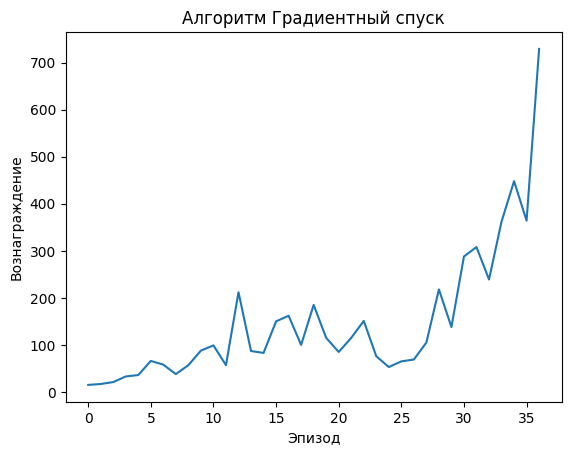

In [35]:
gradient_awards = run_cartpole(method='Градиентный спуск', n_episodes= 100)

# II Часть

Для каждого алгоритма решения увеличьте и уменьшите параметры: для случайного поиска - количество эпизодов, для восхождения на вершину - количество эпизодов и шум, для градиента стратегии - количество эпизодов и скорость обучения. Зафиксируйте получившиеся результаты решения задачи с изначальными и измененными параметрами. В случае, если задача не была решена за N-ое количество эпизодов, попробуйте запустить код алгоритма заново. Сделайте выводы исходя из данных в таблице.

## Тестирование с разными параметрами

In [36]:
res = {}

### Случайный поиск

Случайный поиск
Игра так и не была выигара за 10000 эпизодов


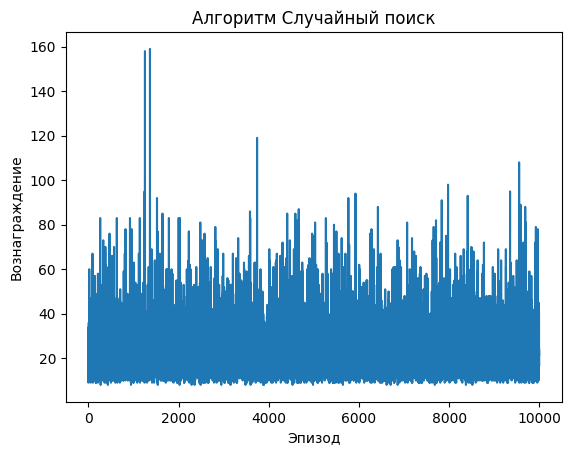

In [37]:
N_random = 10000
random_rewards, random_rounds, random_winned, random_average = run_cartpole(method='Случайный поиск', n_episodes = N_random, output=False)

res['Случайный поиск'] = {
    'total_rounds': N_random,
    'winned': random_winned,
    'reward_average': random_average,
    'rounds_need': len(random_rewards)
}

### Восхождение на вершинну

Уровень шума = 0.03
Восхождение на вершину
Решено за 30 эпизодов!


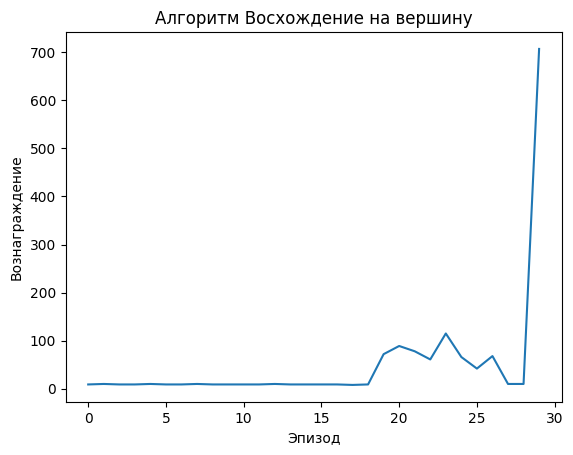

Уровень шума = 0.04
Восхождение на вершину
Решено за 29 эпизодов!


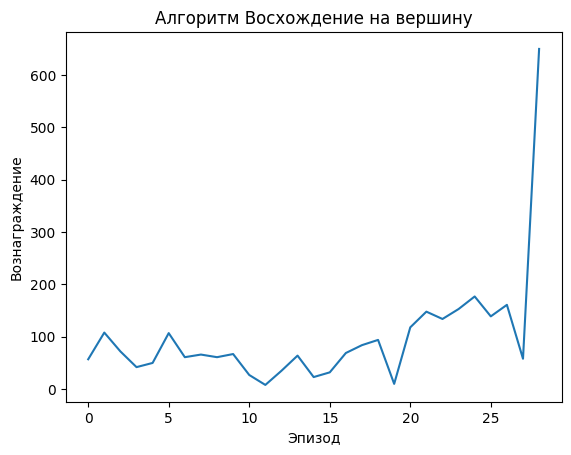

Уровень шума = 0.05
Восхождение на вершину
Решено за 89 эпизодов!


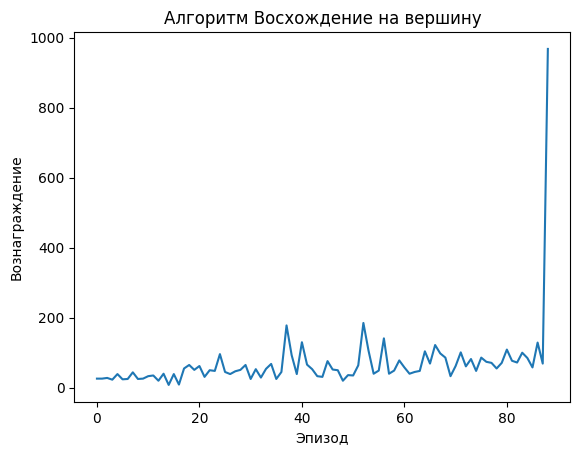

In [38]:
N_hill = 120
hill_res = {}
nl_range = np.arange(0.03, 0.05, 0.01)
h_w, h_a, h_nl, h_r = None, None, None, None

for nl in nl_range: 
    print(f'Уровень шума = {nl}')
    hill_rewards, hill_rounds, hill_winned, hill_average = run_cartpole(method='Восхождение на вершину', n_episodes= N_hill, noise_level = nl, output = False)
    
    if not h_w or (hill_winned and h_a < hill_average):
        h_w = hill_winned
        h_a = hill_average
        h_lr = nl
        h_r = hill_rewards
    
res['Восхождение на вершину'] = {
    'total_rounds': N_hill,
    'winned': h_w,
    'reward_average': h_a,
    'noise_level': h_nl,
    'rounds_need': len(hill_rewards)
}

### Градиентный спуск

Уровень обучения = 0.01
Градиентный спуск
Игра так и не была выигара за 200 эпизодов


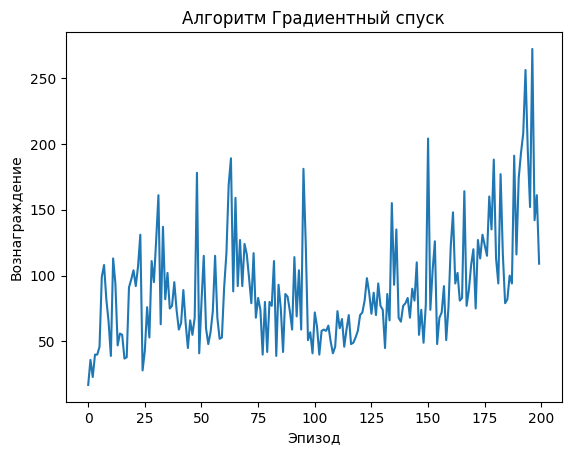

Уровень обучения = 0.02
Градиентный спуск
Решено за 61 эпизодов!


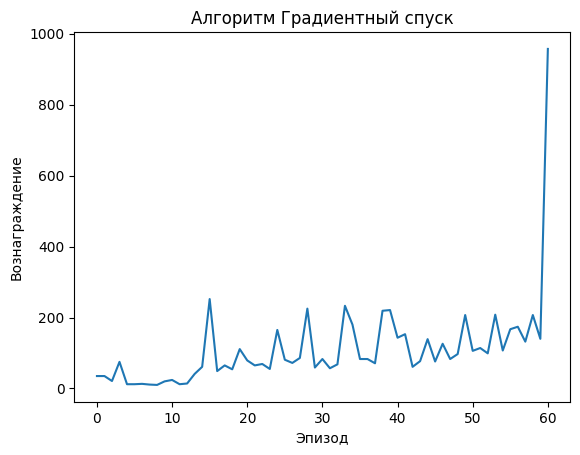

Уровень обучения = 0.03
Градиентный спуск
Решено за 22 эпизодов!


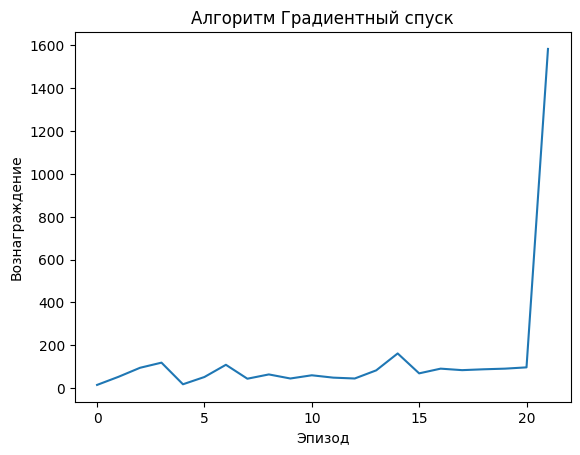

Уровень обучения = 0.04
Градиентный спуск
Решено за 154 эпизодов!


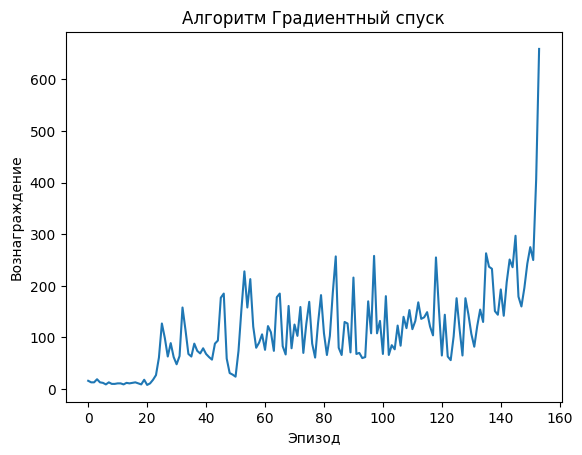

Уровень обучения = 0.05
Градиентный спуск
Решено за 138 эпизодов!


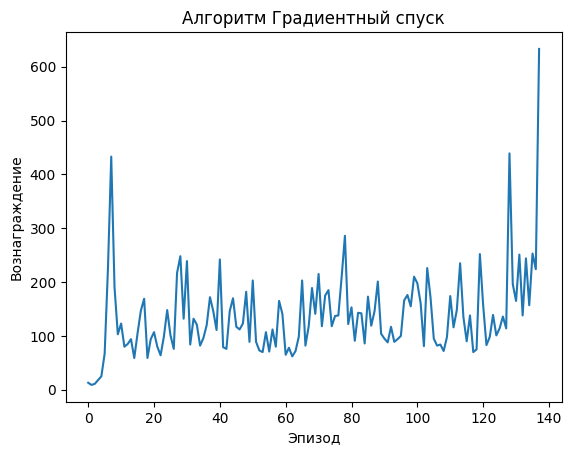

Уровень обучения = 0.060000000000000005
Градиентный спуск
Решено за 128 эпизодов!


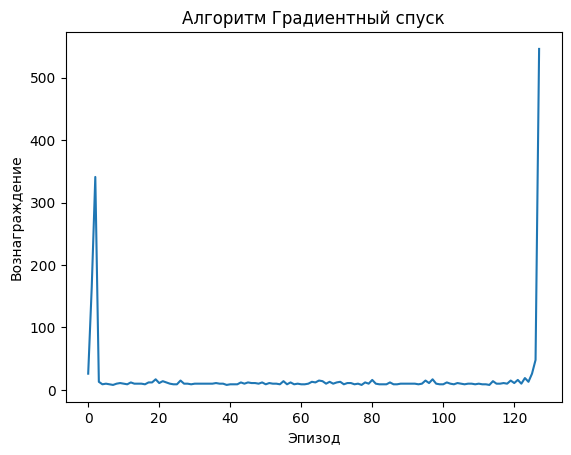

Уровень обучения = 0.06999999999999999
Градиентный спуск
Игра так и не была выигара за 200 эпизодов


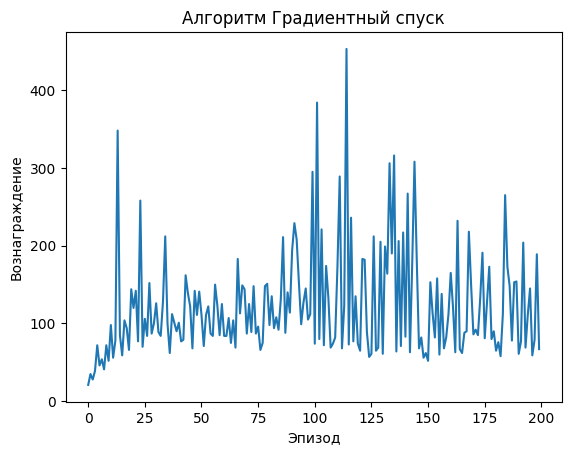

Уровень обучения = 0.08
Градиентный спуск
Игра так и не была выигара за 200 эпизодов


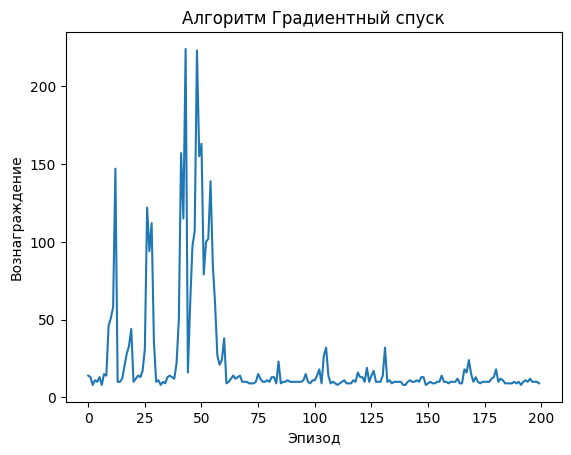

In [40]:
N_gradient = 200
gradient_res = {}
lr_range = np.arange(0.01, 0.08, 0.01)

g_w, g_a, g_lr, g_r = None, None, None, None
for lr in lr_range: 
    print(f'Уровень обучения = {lr}')
    gradient_rewards, gradient_rounds, gradient_winned, gradient_average = run_cartpole(method='Градиентный спуск', n_episodes= N_gradient, lr=lr, output = False)
 
    if not g_w or (gradient_winned and g_a < gradient_average):
        g_w = True
        g_a = gradient_average
        g_lr = lr
        g_r = gradient_rewards
    
res['Градиентный спуск'] = {
    'total_rounds': N_gradient,
    'winned': g_w,
    'reward_average': g_a,
    'noise_level': g_lr,
    'rounds_need': len(g_r)
}

### Результаты

In [41]:
pd.DataFrame.from_dict(res)

,Случайный поиск,Восхождение на вершину,Градиентный спуск
total_rounds,10000,120,200
winned,True,False,True
reward_average,22.1768,69.651685,121.555
rounds_need,10000,89,200
noise_level,NaN,None,0.07


# III часть

In [8]:
res_2 = {}

Реализуйте любой алгоритм из следующих глав для другой среды (например, FrozenLake, Mountain Car или Flappy Bird). Опишите в отчете в чем заключается суть выбранной задачи и методе ее решения.